# Importing the required packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
df = pd.read_csv('train.csv',index_col='tweet_id')

In [3]:
df.head(3)

,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,
567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)


# Data description

In [4]:
df.isnull().sum()

airline_sentiment             0
airline                       0
airline_sentiment_gold    10949
name                          0
negativereason_gold       10956
retweet_count                 0
text                          0
tweet_coord               10204
tweet_created                 0
tweet_location             3550
user_timezone              3577
dtype: int64

In [5]:
df.drop(labels=['airline_sentiment_gold','negativereason_gold','tweet_coord','user_timezone'],axis=1, inplace=True)

In [6]:
df.isnull().sum()

airline_sentiment       0
airline                 0
name                    0
retweet_count           0
text                    0
tweet_created           0
tweet_location       3550
dtype: int64

In [7]:
df.describe()

,retweet_count
count,10980.000000
mean,0.080965
std,0.740303
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,44.000000


In [8]:
df.drop(['tweet_location', 'tweet_created'],axis=1, inplace=True)

In [9]:
df.head(5)

,airline_sentiment,airline,name,retweet_count,text
tweet_id,,,,,
567900433542488064,negative,Southwest,ColeyGirouard,0,"@SouthwestAir I am scheduled for the morning, ..."
569989168903819264,positive,Southwest,WalterFaddoul,0,@SouthwestAir seeing your workers time in and ...
568089179520954368,positive,United,LocalKyle,0,@united Flew ORD to Miami and back and had gr...
568928195581513728,negative,Southwest,amccarthy19,0,@SouthwestAir @dultch97 that's horse radish 😤🐴
568594180014014464,negative,United,J_Okayy,0,@united so our flight into ORD was delayed bec...


In [10]:
df['airline'].value_counts()

airline
United            2928
US Airways        2152
American          2078
Southwest         1817
Delta             1639
Virgin America     366
Name: count, dtype: int64

In [11]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    6851
neutral     2327
positive    1802
Name: count, dtype: int64

# Data Visualization

In [12]:
corel = pd.crosstab(df['airline'],df['airline_sentiment'])
corel

airline_sentiment,negative,neutral,positive
airline,,,
American,1468,359,251
Delta,691,535,413
Southwest,870,512,435
US Airways,1678,277,197
United,2011,517,400
Virgin America,133,127,106


In [13]:
airline_names = np.array(df.airline)
airline_uniques = np.unique(airline_names)
airline_uniques

array(['American', 'Delta', 'Southwest', 'US Airways', 'United',
       'Virgin America'], dtype=object)

In [14]:
comment_type = np.array(df.airline_sentiment)
comment_type

array(['negative', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [15]:
comment_type, frequency = np.unique(comment_type,return_counts=True)

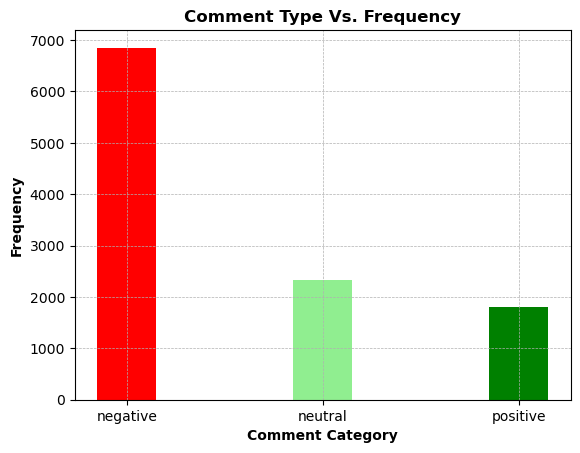

In [16]:
colours = ['red', 'lightgreen', 'green']
plt.bar(comment_type, frequency, color = colours,width = 0.3, align='center')
plt.grid(linestyle='--', linewidth=0.5)
plt.title('Comment Type Vs. Frequency', weight='bold')
plt.xlabel('Comment Category',weight = 'bold')
plt.ylabel('Frequency', weight = 'bold')
plt.show()

In [17]:
def add_reviews(x):
    reviews = dict()
    for key,value in x.items():
        reviews[key] = value
    return reviews

In [18]:
# converting the given dataset values into dictionary
airline_dictionary = {}
length = 0
for i in airline_uniques:
    airline_dictionary[i] = add_reviews(corel.iloc[length])
    length += 1
airline_dictionary

{'American': {'negative': 1468, 'neutral': 359, 'positive': 251},
 'Delta': {'negative': 691, 'neutral': 535, 'positive': 413},
 'Southwest': {'negative': 870, 'neutral': 512, 'positive': 435},
 'US Airways': {'negative': 1678, 'neutral': 277, 'positive': 197},
 'United': {'negative': 2011, 'neutral': 517, 'positive': 400},
 'Virgin America': {'negative': 133, 'neutral': 127, 'positive': 106}}

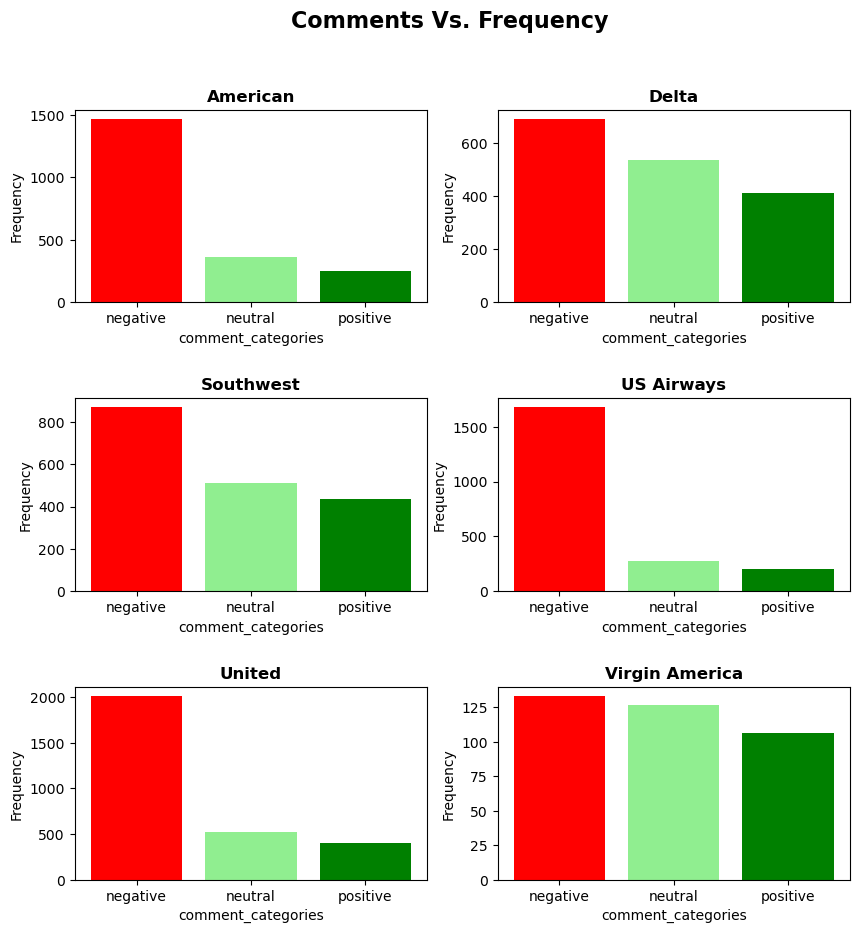

In [20]:
fig, ((ax0,ax1), (ax2,ax3), (ax4,ax5)) = plt.subplots(nrows=3,ncols=2, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
pos = 0
colours = ['red','lightgreen','green']
graph_pos = [ax0, ax1, ax2, ax3, ax4, ax5]
for i in airline_dictionary.keys():
    categories, values = list(airline_dictionary[i].keys()), list(airline_dictionary[i].values())
    bar_1 = graph_pos[pos].bar(categories, values, color=colours)
    graph_pos[pos].set(title=i, xlabel='comment_categories', ylabel='Frequency')
    graph_pos[pos].title.set_fontweight('bold')
    fig.suptitle("Comments Vs. Frequency", fontsize= 16, fontweight='bold')
    pos += 1
plt.show()


In [21]:
df

,airline_sentiment,airline,name,retweet_count,text
tweet_id,,,,,
567900433542488064,negative,Southwest,ColeyGirouard,0,"@SouthwestAir I am scheduled for the morning, ..."
569989168903819264,positive,Southwest,WalterFaddoul,0,@SouthwestAir seeing your workers time in and ...
568089179520954368,positive,United,LocalKyle,0,@united Flew ORD to Miami and back and had gr...
568928195581513728,negative,Southwest,amccarthy19,0,@SouthwestAir @dultch97 that's horse radish 😤🐴
568594180014014464,negative,United,J_Okayy,0,@united so our flight into ORD was delayed bec...
...,...,...,...,...,...
569934458364813313,neutral,American,Cottopanama85,0,@AmericanAir followback
568564006329434113,positive,United,PaulBEsteves,0,@united thanks for the help. Wish the phone re...
569643648910028801,negative,US Airways,runfixsteve,0,@usairways the. Worst. Ever. #dca #customerser...


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.text)
matrix = words.toarray()
feat_dict = sorted(cv.vocabulary_.keys())
dataset = pd.DataFrame(data = matrix, columns=feat_dict)
dataset.head(3)

,00,000,000114,000ft,0011,0016,00a,00am,00p,00pm,...,zqutus7epw,zrh,zrh_airport,zsdgzydnde,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zzps5ywve2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
sum_words = words.sum(axis=0)

In [55]:
words_freq = [(words, sum_words[0,i]) for word,i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse= True)
freq = pd.DataFrame(words_freq, columns = ['word', 'freq'])
freq.head(30).plot(x='word', y='freq',kind = 'bar', color='blue')


<Axes: xlabel='word'>

E:\CodingNinjas\MachineLearning\Week-14\SentimentAnalysis\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
